In [58]:
import pandas as pd

In [59]:
CompleteData=pd.read_csv('/content/Student Insomnia and Educational Outcomes Dataset.csv')
CompleteData.head()


,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/2024 16:51:15,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/2024 16:51:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/2024 16:52:21,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/2024 16:53:00,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/2024 16:53:25,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average


In [60]:
CompleteData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 16 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                   --------------  ----- 
 0   Timestamp                                                                                                                791 non-null    object
 1   1. What is your year of study?                                                                                           791 non-null    object
 2   2. What is your gender?                                                                                                  791 non-null    object
 3   3. How often do you have difficulty falling asleep at night?                                                             791 non-null    object
 

In [61]:
phase1=CompleteData.iloc[:,[4,15]].copy()
phase1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 2 columns):
 #   Column                                                                                          Non-Null Count  Dtype 
---  ------                                                                                          --------------  ----- 
 0   4. On average, how many hours of sleep do you get on a typical day?                             791 non-null    object
 1   15. How would you rate your overall academic performance (GPA or grades) in the past semester?  791 non-null    object
dtypes: object(2)
memory usage: 12.5+ KB


In [62]:
phase1=phase1.rename(columns={
    '4. On average, how many hours of sleep do you get on a typical day?':'sleep_hours',
    '15. How would you rate your overall academic performance (GPA or grades) in the past semester?':'academic_performance'
})
phase1

,sleep_hours,academic_performance
0,7-8 hours,Average
1,7-8 hours,Good
2,7-8 hours,Below Average
3,More than 8 hours,Excellent
4,7-8 hours,Average
...,...,...
786,More than 8 hours,Average
787,More than 8 hours,Poor
788,More than 8 hours,Poor
789,7-8 hours,Below Average


In [63]:
phase1['sleep_hours'].unique()

array(['7-8 hours', 'More than 8 hours', '6-7 hours', '4-5 hours',
       'Less than 4 hours'], dtype=object)

In [64]:
phase1['academic_performance'].unique()

array(['Average', 'Good', 'Below Average', 'Excellent', 'Poor'],
      dtype=object)

In [65]:
phase1['sleep_hours']=phase1['sleep_hours'].map(
    {
        '7-8 hours':4,
        'More than 8 hours':5,
        '6-7 hours':3,
        '4-5 hours':2,
        'Less than 4 hours':1
    }
)
phase1['academic_performance']=phase1['academic_performance'].map(
    {
        'Average':3,
        'Good':4,
        'Below Average':2,
        'Excellent':5,
        'Poor':1
    }
)
phase1

,sleep_hours,academic_performance
0,4,3
1,4,4
2,4,2
3,5,5
4,4,3
...,...,...
786,5,3
787,5,1
788,5,1
789,4,2


In [66]:
phase1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   sleep_hours           791 non-null    int64
 1   academic_performance  791 non-null    int64
dtypes: int64(2)
memory usage: 12.5 KB


In [67]:
# EDA for phase1

# first calculating the mean and median of academic_performance of the students in each category of the sleep_hours
mean_of_poor_sleep_students=phase1['academic_performance'].loc[phase1['sleep_hours']==1,].mean()
mean_of_bavg_sleep_studetns=phase1['academic_performance'].loc[phase1['sleep_hours']==2].mean()
mean_of_avg_sleep_students=phase1['academic_performance'].loc[phase1['sleep_hours']==3].mean()
mean_of_good_sleep_students=phase1['academic_performance'].loc[phase1['sleep_hours']==4].mean()
mean_of_excell_sleep_students=phase1['academic_performance'].loc[phase1['sleep_hours']==5].mean()
print(mean_of_poor_sleep_students,mean_of_bavg_sleep_studetns,mean_of_avg_sleep_students,mean_of_good_sleep_students,mean_of_excell_sleep_students)

2.5 2.5714285714285716 2.1666666666666665 1.6217494089834514 1.5045045045045045


In [68]:
phase1['sleep_hours'].value_counts()

,count
sleep_hours,
4,423
5,333
3,24
2,7
1,4


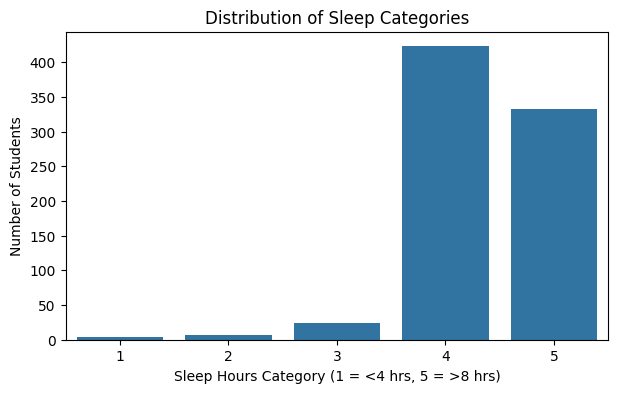

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.countplot(x='sleep_hours', data=phase1)
plt.xlabel('Sleep Hours Category (1 = <4 hrs, 5 = >8 hrs)')
plt.ylabel('Number of Students')
plt.title('Distribution of Sleep Categories')
plt.show()


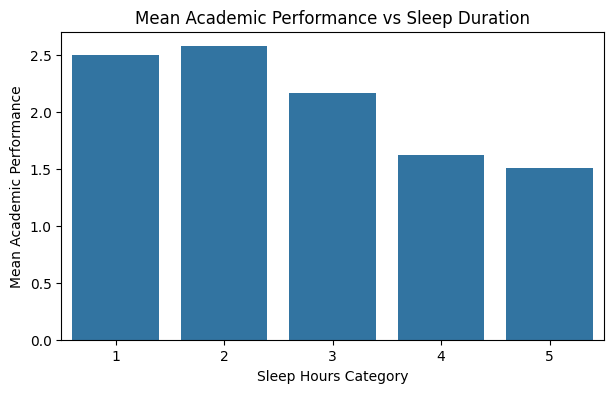

In [70]:
plt.figure(figsize=(7,4))
sns.barplot(
    x='sleep_hours',
    y='academic_performance',
    data=phase1,
    estimator='mean',
    errorbar=None
)
plt.xlabel('Sleep Hours Category')
plt.ylabel('Mean Academic Performance')
plt.title('Mean Academic Performance vs Sleep Duration')
plt.show()


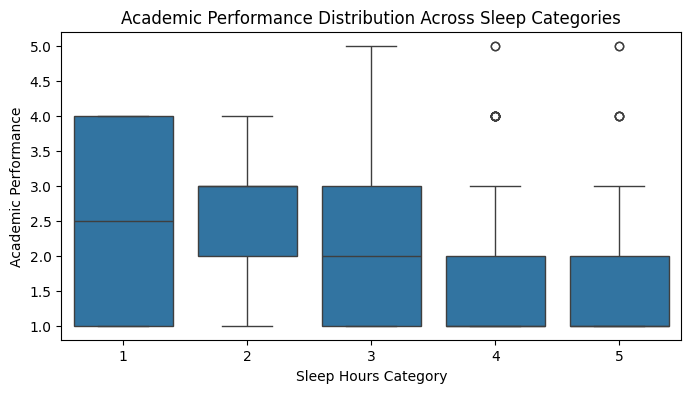

In [71]:
plt.figure(figsize=(8,4))
sns.boxplot(
    x='sleep_hours',
    y='academic_performance',
    data=phase1
)
plt.xlabel('Sleep Hours Category')
plt.ylabel('Academic Performance')
plt.title('Academic Performance Distribution Across Sleep Categories')
plt.show()


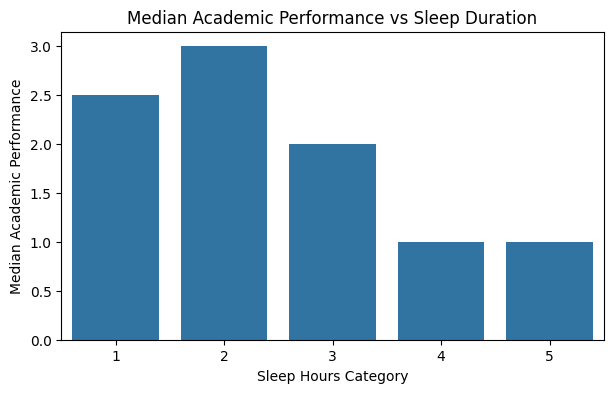

In [72]:
median_perf = phase1.groupby('sleep_hours')['academic_performance'].median().reset_index()

plt.figure(figsize=(7,4))
sns.barplot(
    x='sleep_hours',
    y='academic_performance',
    data=median_perf
)
plt.xlabel('Sleep Hours Category')
plt.ylabel('Median Academic Performance')
plt.title('Median Academic Performance vs Sleep Duration')
plt.show()


“The count plot reveals a strong imbalance in sleep categories, with most students reporting 7 hours or more of sleep. Boxplots indicate overlapping academic performance distributions across sleep categories, suggesting that while sleep duration may influence performance, it alone does not determine outcomes. Due to limited samples in low-sleep categories, conclusions about all-nighters remain statistically weak.”

In Phase 1, we focused on exploratory analysis rather than predictive modeling. The dataset showed extreme imbalance in sleep categories, with very few low-sleep samples. Training a regression model under these conditions would lead to unreliable and misleading conclusions. Hence, Phase 1 is used to assess data suitability and guide further feature inclusion.

In [73]:
phase2=CompleteData.iloc[:,[6,14,15]].copy()

In [74]:
phase2

,6. How would you rate the overall quality of your sleep?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,Good,High stress,Average
1,Good,Low stress,Good
2,Good,High stress,Below Average
3,Poor,Extremely high stress,Excellent
4,Very good,Low stress,Average
...,...,...,...
786,Very poor,Extremely high stress,Average
787,Poor,Extremely high stress,Poor
788,Very poor,Extremely high stress,Poor
789,Average,High stress,Below Average


In [75]:
phase2=phase2.rename(columns=
    {
        '6. How would you rate the overall quality of your sleep?':'sleep_quality',
        '14. How would you describe your stress levels related to academic workload?':'stress_levels',
        '15. How would you rate your overall academic performance (GPA or grades) in the past semester?':'academic_performance'
    }
)
phase2.head()

,sleep_quality,stress_levels,academic_performance
0,Good,High stress,Average
1,Good,Low stress,Good
2,Good,High stress,Below Average
3,Poor,Extremely high stress,Excellent
4,Very good,Low stress,Average


In [76]:
print(phase2['sleep_quality'].unique())
print(phase2['stress_levels'].unique())
print(phase2['academic_performance'].unique())

['Good' 'Poor' 'Very good' 'Average' 'Very poor']
['High stress' 'Low stress' 'Extremely high stress' 'No stress']
['Average' 'Good' 'Below Average' 'Excellent' 'Poor']


In [77]:
phase2['sleep_quality'] = phase2['sleep_quality'].map({
    'Very poor': 1,
    'Poor': 2,
    'Average': 3,
    'Good': 4,
    'Very good': 5
})

phase2['stress_levels'] = phase2['stress_levels'].map({
    'Extremely high stress': 1,
    'High stress': 2,
    'Low stress': 3,
    'No stress': 4
})

phase2['academic_performance'] = phase2['academic_performance'].map({
    'Poor': 1,
    'Below Average': 2,
    'Average': 3,
    'Good': 4,
    'Excellent': 5
})
print(phase2)

phase2.info()

     sleep_quality  stress_levels  academic_performance
0                4              2                     3
1                4              3                     4
2                4              2                     2
3                2              1                     5
4                5              3                     3
..             ...            ...                   ...
786              1              1                     3
787              2              1                     1
788              1              1                     1
789              3              2                     2
790              2              1                     1

[791 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   sleep_quality         791 non-null    int64
 1   stress_levels         791 non-null    int64
 2  

In [78]:
phase2['sleep_quality'].value_counts()

,count
sleep_quality,
1,246
5,204
4,170
2,125
3,46


In [79]:
phase2['stress_levels'].value_counts()

,count
stress_levels,
1,373
2,366
3,46
4,6


In [80]:
phase2['academic_performance'].value_counts()

,count
academic_performance,
1,419
2,297
3,52
4,17
5,6


The dataset shows skewed distributions in stress levels and academic performance, with a majority of students reporting high stress and lower academic performance. While all categories are present, some higher-performing and low-stress groups are underrepresented, which necessitates cautious interpretation of downstream models.

In [81]:
median_aca_sleep_quality_1=phase2['academic_performance'].loc[phase2['sleep_quality']==1].median()
median_aca_sleep_quality_2=phase2['academic_performance'].loc[phase2['sleep_quality']==2].median()
median_aca_sleep_quality_3=phase2['academic_performance'].loc[phase2['sleep_quality']==3].median()
median_aca_sleep_quality_4=phase2['academic_performance'].loc[phase2['sleep_quality']==4].median()
median_aca_sleep_quality_5=phase2['academic_performance'].loc[phase2['sleep_quality']==5].median()
print(median_aca_sleep_quality_1,median_aca_sleep_quality_2,median_aca_sleep_quality_3,median_aca_sleep_quality_4,median_aca_sleep_quality_5)

1.0 2.0 2.0 2.0 1.0


In [82]:
median_aca_stress_levels_1=phase2['academic_performance'].loc[phase2['stress_levels']==1].median()
median_aca_stress_levels_2=phase2['academic_performance'].loc[phase2['stress_levels']==2].median()
median_aca_stress_levels_3=phase2['academic_performance'].loc[phase2['stress_levels']==3].median()
median_aca_stress_levels_4=phase2['academic_performance'].loc[phase2['stress_levels']==4].median()
print(median_aca_stress_levels_1,median_aca_stress_levels_2,median_aca_stress_levels_3,median_aca_stress_levels_4)

1.0 2.0 2.0 1.0


Median-based analysis shows that academic performance is largely concentrated in the lower categories across sleep quality and stress levels. While mean values suggest some variation, median results indicate weak separation, highlighting the dominance of low performance outcomes and suggesting that sleep quality and stress alone have limited explanatory power.

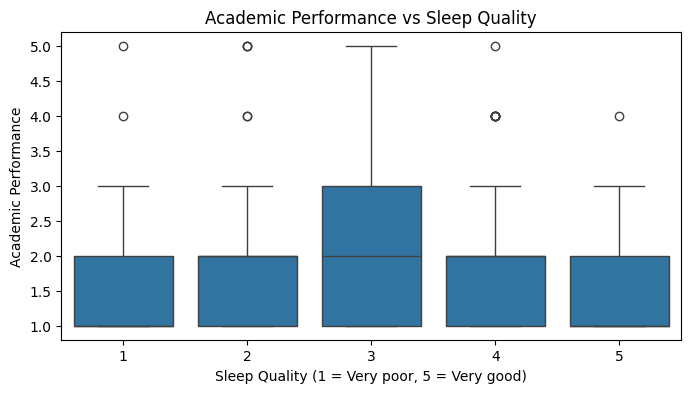

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(
    x='sleep_quality',
    y='academic_performance',
    data=phase2
)
plt.xlabel('Sleep Quality (1 = Very poor, 5 = Very good)')
plt.ylabel('Academic Performance')
plt.title('Academic Performance vs Sleep Quality')
plt.show()


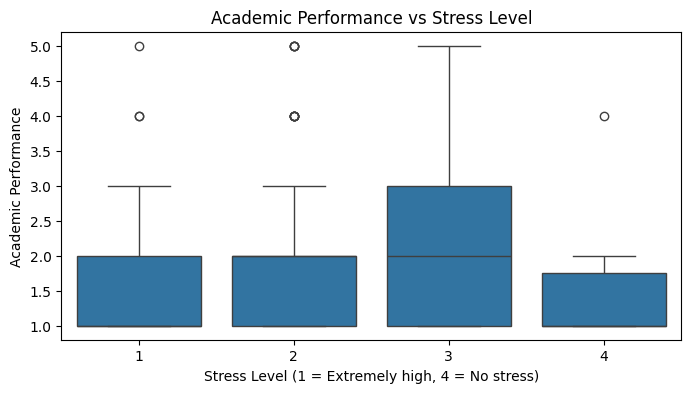

In [84]:
plt.figure(figsize=(8, 4))
sns.boxplot(
    x='stress_levels',
    y='academic_performance',
    data=phase2
)
plt.xlabel('Stress Level (1 = Extremely high, 4 = No stress)')
plt.ylabel('Academic Performance')
plt.title('Academic Performance vs Stress Level')
plt.show()


In [85]:
from sklearn.model_selection import train_test_split

x_phase2=phase2[['sleep_quality','stress_levels']].copy()
y_phase2=phase2['academic_performance'].copy()

x_train_phase2,x_test_phase2,y_train_phase2,y_test_phase2=train_test_split(
    x_phase2,y_phase2,test_size=0.2,random_state=42,stratify=y_phase2
)


In [86]:
print(x_train_phase2.isna().sum(),x_test_phase2.isna().sum(),y_train_phase2.isna().sum(),y_test_phase2.isna().sum())

sleep_quality    0
stress_levels    0
dtype: int64 sleep_quality    0
stress_levels    0
dtype: int64 0 0


In [87]:
from sklearn.linear_model import LinearRegression

model_phase2=LinearRegression()

model_phase2.fit(x_train_phase2,y_train_phase2)

LinearRegression()

In [88]:
y_pred_phase2=model_phase2.predict(x_test_phase2)

In [89]:
from sklearn.metrics import r2_score

r2_phase2=r2_score(y_test_phase2,y_pred_phase2)
print(r2_phase2)

0.06466780318760224


In [90]:
from sklearn.metrics import mean_absolute_error

mae_phase2 = mean_absolute_error(y_test_phase2, y_pred_phase2)
print("MAE:", mae_phase2)


MAE: 0.5970613051737296


Phase 2 Conclusion: Sleep Quality, Stress, and Academic Performance

In Phase 2, exploratory data analysis and a baseline linear regression model were used to examine the relationship between sleep quality, academic stress, and academic performance.

Exploratory analysis revealed that academic performance was heavily skewed toward lower categories, and both sleep quality and stress levels showed substantial overlap across performance groups. Median-based analysis indicated weak separation, suggesting that neither sleep quality nor stress alone strongly differentiates students by academic outcomes. Boxplots further confirmed this overlap, highlighting high variability within each category.

A baseline linear regression model trained using sleep quality and stress levels achieved a Mean Absolute Error (MAE) of approximately 0.6, indicating that predictions were, on average, within about half a performance category. However, the model produced a low R² value (~0.065), meaning that these features together explain only a small portion of the variance in academic performance.

These results suggest that sleep quality and academic stress are weak but non-negligible contributors to academic performance. While they show some association with outcomes, they are insufficient as standalone predictors, and a substantial amount of performance variability is likely driven by unobserved factors such as study habits, prior academic background, motivation, and instructional quality.

Overall, Phase 2 demonstrates that sleep and stress alone do not strongly predict academic performance, reinforcing the importance of considering a broader set of academic and behavioral variables in predictive modeling.



In [91]:
phase3_rename_map = {

    # ─────────────────────────────
    # TARGET (Academic Outcome)
    # ─────────────────────────────
    '15. How would you rate your overall academic performance (GPA or grades) in the past semester?':
        'academic_performance',

    # ─────────────────────────────
    # SLEEP (Root causes)
    # ─────────────────────────────
    '6. How would you rate the overall quality of your sleep?':
        'sleep_quality',

    '4. On average, how many hours of sleep do you get on a typical day?':
        'sleep_hours',

    # ─────────────────────────────
    # STRESS (Context / Control)
    # ─────────────────────────────
    '14. How would you describe your stress levels related to academic workload?':
        'stress_level',

    # ─────────────────────────────
    # ACADEMIC CONSEQUENCES (KEY for Phase 3)
    # ─────────────────────────────
    '7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?':
        'concentration_difficulty',

    '9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?':
        'class_skipping',

    '10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?':
        'assignment_impact'
}


In [92]:
phase3=CompleteData.copy()
phase3=phase3.rename(columns=phase3_rename_map)
phase3=phase3.drop(phase3.columns[[0,1,2,3,5,8,11,12,13]],axis=1)
phase3

,sleep_hours,sleep_quality,concentration_difficulty,class_skipping,assignment_impact,stress_level,academic_performance
0,7-8 hours,Good,Sometimes,Often (3-4 times a week),Moderate impact,High stress,Average
1,7-8 hours,Good,Often,Sometimes (1-2 times a week),Major impact,Low stress,Good
2,7-8 hours,Good,Often,Sometimes (1-2 times a week),Major impact,High stress,Below Average
3,More than 8 hours,Poor,Often,Rarely (1-2 times a month),Minor impact,Extremely high stress,Excellent
4,7-8 hours,Very good,Always,Sometimes (1-2 times a week),Moderate impact,Low stress,Average
...,...,...,...,...,...,...,...
786,More than 8 hours,Very poor,Always,Often (3-4 times a week),Major impact,Extremely high stress,Average
787,More than 8 hours,Poor,Often,Often (3-4 times a week),Severe impact,Extremely high stress,Poor
788,More than 8 hours,Very poor,Always,Always,Severe impact,Extremely high stress,Poor
789,7-8 hours,Average,Often,Often (3-4 times a week),Severe impact,High stress,Below Average


In [93]:
academic_performance_map = {
    'Poor': 1,
    'Below Average': 2,
    'Average': 3,
    'Good': 4,
    'Excellent': 5
}
sleep_quality_map = {
    'Very poor': 1,
    'Poor': 2,
    'Average': 3,
    'Good': 4,
    'Very good': 5
}
sleep_hours_map = {
    'Less than 4 hours': 1,
    '4-5 hours': 2,
    '6-7 hours': 3,
    '7-8 hours': 4,
    'More than 8 hours': 5
}
stress_level_map = {
    'Extremely high stress': 1,
    'High stress': 2,
    'Low stress': 3,
    'No stress': 4
}
concentration_difficulty_map = {
    'Always': 1,
    'Often': 2,
    'Sometimes': 3,
    'Rarely': 4,
    'Never': 5
}
assignment_impact_map = {
    'Severe impact': 1,
    'Major impact': 2,
    'Moderate impact': 3,
    'Minor impact': 4,
    'No impact': 5
}
class_skipping_map = {
    'Always': 1,
    'Often (3-4 times a week)': 2,
    'Sometimes (1-2 times a week)': 3,
    'Rarely (1-2 times a month)': 4,
    'Never': 5
}


In [94]:
phase3['concentration_difficulty'] = phase3['concentration_difficulty'].map(concentration_difficulty_map)
phase3['assignment_impact'] = phase3['assignment_impact'].map(assignment_impact_map)
phase3['class_skipping'] = phase3['class_skipping'].map(class_skipping_map)
phase3['academic_performance'] = phase3['academic_performance'].map(academic_performance_map)
phase3['sleep_hours'] = phase3['sleep_hours'].map(sleep_hours_map)
phase3['sleep_quality'] = phase3['sleep_quality'].map(sleep_quality_map)
phase3['stress_level']=phase3['stress_level'].map(stress_level_map)
phase3.head()

,sleep_hours,sleep_quality,concentration_difficulty,class_skipping,assignment_impact,stress_level,academic_performance
0,4,4,3,2,3,2,3
1,4,4,2,3,2,3,4
2,4,4,2,3,2,2,2
3,5,2,2,4,4,1,5
4,4,5,1,3,3,3,3


In [95]:
phase3.isna().sum()

,0
sleep_hours,0
sleep_quality,0
concentration_difficulty,0
class_skipping,0
assignment_impact,0
stress_level,0
academic_performance,0


In [96]:
x_phase3=phase3[
      [
        'sleep_hours',
        'sleep_quality',
        'stress_level',
        'concentration_difficulty',
        'assignment_impact',
        'class_skipping'
    ]
].copy()
y_phase3=phase3['academic_performance']

In [97]:
x_phase3_train,x_phase3_test,y_phase3_train,y_phase3_test=train_test_split(
    x_phase3,y_phase3,test_size=0.2,random_state=42,stratify=y_phase3
)

In [98]:
model_phase3 = LinearRegression()
model_phase3.fit(x_phase3_train, y_phase3_train)

LinearRegression()

In [99]:
r2_phase3=r2_score(y_phase3_test,model_phase3.predict(x_phase3_test))
print(r2_phase3)

0.16786263570117055


In [100]:
mae_phase3=mean_absolute_error(y_phase3_test,model_phase3.predict(x_phase3_test))
print(mae_phase3)

0.5657662584840762


In [101]:
coef_table=pd.DataFrame(
    {
        'feature':x_phase3.columns,
        'coefficient':model_phase3.coef_
    }
)
coef_table

,feature,coefficient
0,sleep_hours,-0.063843
1,sleep_quality,-0.012986
2,stress_level,0.159304
3,concentration_difficulty,0.176585
4,assignment_impact,0.109327
5,class_skipping,0.058883


A final regression model incorporating sleep duration, sleep quality, academic stress, and academic consequences of sleep loss was trained to evaluate their combined impact on academic performance. The model achieved a mean absolute error of approximately 0.56 and an R² of ~0.17, indicating moderate explanatory power given the multifactorial nature of academic outcomes.

Notably, academic functioning variables—particularly difficulty concentrating and assignment impact—showed the strongest associations with academic performance. In contrast, sleep duration and sleep quality exhibited weak direct effects once these consequences were included. This suggests that sleep influences academic performance primarily through its impact on cognitive functioning and productivity, rather than through sleep duration alone.

All-nighters are largely a myth rather than a miracle.
While reduced sleep may increase available study time, the resulting declines in concentration, productivity, and academic functioning outweigh any potential benefit, leading to poorer overall academic outcomes.